In [1]:
#UDP ATTACK ANALYSIS ISM PROJECT
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv(r"revised_kddcup_dataset.csv",index_col=0)

In [3]:
df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [4]:
udp_df = df[df.loc[:,"protocol_type"] == "udp"]

In [5]:
udp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,private,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [6]:
#there are no null values from previous knowledge

In [7]:
#converting categorical values to numerical values
service_values = np.unique(udp_df.loc[:,"service"])
mid = (len(service_values)+1)/2
for i in range(len(service_values)):
    udp_df = udp_df.replace(service_values[i], (i-mid)/10)

In [8]:
udp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
1,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
2,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,normal.
3,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,snmpgetattack.
4,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,snmpgetattack.


In [9]:
#I will be extracting all the important features as a "priority" for preprocessing
features = ["service","src_bytes","dst_bytes","wrong_fragment","count","num_compromised","srv_count","dst_host_srv_count","dst_host_diff_srv_rate"]
target = "result"

In [10]:
X = udp_df.loc[:,features]
y = udp_df.loc[:,target]

In [11]:
classes = np.unique(y)
print(classes)

['multihop.' 'normal.' 'saint.' 'satan.' 'snmpgetattack.' 'snmpguess.'
 'teardrop.' 'udpstorm.']


In [12]:
udp_df['result'].unique()

array(['normal.', 'snmpgetattack.', 'saint.', 'udpstorm.', 'multihop.',
       'satan.', 'teardrop.', 'snmpguess.'], dtype=object)

In [13]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
udp_df['result']= label_encoder.fit_transform(udp_df['result'])
udp_df['result'].unique()

array([1, 4, 2, 7, 0, 3, 6, 5])

In [14]:
#turning the service attribute to categorical values
udp_df=udp_df.replace("eco_i",-0.1)
udp_df=udp_df.replace("ecr_i",0.0)
udp_df=udp_df.replace("tim_i",0.1)
udp_df=udp_df.replace("urp_i",0.2)

In [15]:
udp_df.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,result
0,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
1,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
2,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,1
3,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.00,0.0,0.0,0.0,0.0,0.0,4
4,0,udp,0.0,SF,105,146,0,0,0,0,...,254,1.0,0.01,0.01,0.0,0.0,0.0,0.0,0.0,4


[]

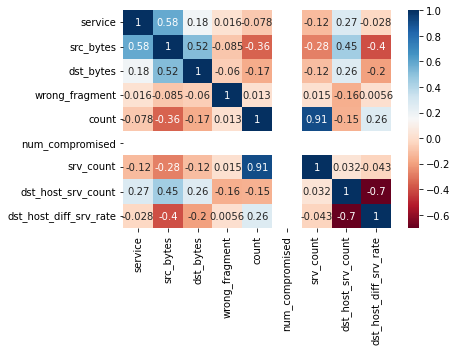

In [16]:
#I selected certain features but I will have to find some covariance between them so I will plot a covariance heatmap
sns.heatmap(X.corr(), annot=True,cmap="RdBu")
plt.plot()
#the data as seen is highly uncorrelated as most of it is one valued such as the duration one.

In [17]:
from sklearn.ensemble import RandomForestClassifier

In [18]:
y = udp_df.loc[:,target]

In [19]:
rs = RandomForestClassifier()
rs.fit(X,y)
print(pd.Series(rs.feature_importances_,index=features).sort_values(ascending=False))

dst_bytes                 0.381268
src_bytes                 0.168683
dst_host_srv_count        0.120688
srv_count                 0.108834
count                     0.097534
service                   0.089787
dst_host_diff_srv_rate    0.032489
wrong_fragment            0.000717
num_compromised           0.000000
dtype: float64


In [20]:
#updated feature selection to release overfitting and accuracy improvement
#in generalised prediction
X = X.loc[:,["dst_bytes","service","src_bytes","dst_host_srv_count","count"]]
X.head(20)

,dst_bytes,service,src_bytes,dst_host_srv_count,count
0,146,0.0,105,254,1
1,146,0.0,105,254,1
2,146,0.0,105,254,1
3,146,0.0,105,254,2
4,146,0.0,105,254,2
5,146,0.0,105,255,2
6,0,-0.3,29,3,2
7,146,0.0,105,253,1
8,146,0.0,105,254,2
10,146,0.0,105,254,2


In [21]:
print(list(X.loc[32,:])) #5 attributes

[146.0, 0.0, 105.0, 254.0, 2.0]


In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3)

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [24]:
models = [LogisticRegression(), KNeighborsClassifier(n_neighbors=3),MLPClassifier(alpha=0.005),DecisionTreeClassifier(),SVC(),GaussianNB(),RandomForestClassifier(),AdaBoostClassifier(),GradientBoostingClassifier(),XGBClassifier()]
classifiers = ["LR", "KNN","MLP","DT","SVM","NB","RF","AdaBoost","GB","XGB"]
scores = []

In [25]:
for model in models:
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    score = accuracy_score(y_test, y_pred)*100
    scores.append(score)
    print("Accuracy of the model is: ", score)
    conf_matrix = confusion_matrix(y_test,y_pred)
    report = classification_report(y_test,y_pred)
    print("Confusion Matrix:\n",conf_matrix)
    print("Report:\n",report)
    print("\n==============***===============")

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

Accuracy of the model is:  73.11197103982025
Confusion Matrix:
 [[   0    3    0    0    0    0    0]
 [   0 3780    0   15 1024   38    0]
 [   0    4    0    0    0    0    0]
 [   0    6    0  118    0    0    0]
 [   0 1033    0    0 1253    0    0]
 [   0   28    0    0    0  706    0]
 [   0    3    0    0    0    0    0]]
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.78      0.78      0.78      4857
           2       0.00      0.00      0.00         4
           3       0.89      0.95      0.92       124
           4       0.55      0.55      0.55      2286
           5       0.95      0.96      0.96       734
           6       0.00      0.00      0.00         3

    accuracy                           0.73      8011
   macro avg       0.45      0.46      0.46      8011
weighted avg       0.73      0.73      0.73      8011


==============***===============
Accuracy of the model is:  74

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of the model is:  72.12582698789166
Confusion Matrix:
 [[   0    3    0    0    0    0    0]
 [   2 2712    3   15 2119    6    0]
 [   0    0    2    2    0    0    0]
 [   0    2    1  121    0    0    0]
 [   0   77    0    0 2209    0    0]
 [   0    0    0    0    0  734    0]
 [   0    3    0    0    0    0    0]]
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.97      0.56      0.71      4857
           2       0.33      0.50      0.40         4
           3       0.88      0.98      0.92       124
           4       0.51      0.97      0.67      2286
           5       0.99      1.00      1.00       734
           6       0.00      0.00      0.00         3

    accuracy                           0.72      8011
   macro avg       0.53      0.57      0.53      8011
weighted avg       0.84      0.72      0.73      8011


==============***===============
Accuracy of the model is:  77

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of the model is:  69.54187991511671
Confusion Matrix:
 [[   0    3    0    0    0    0    0]
 [   3 2610    0   29 2199   16    0]
 [   0    2    0    2    0    0    0]
 [   0    2    0  122    0    0    0]
 [   0  154    0    0 2132    0    0]
 [   0   27    0    0    0  707    0]
 [   0    3    0    0    0    0    0]]
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.93      0.54      0.68      4857
           2       0.00      0.00      0.00         4
           3       0.80      0.98      0.88       124
           4       0.49      0.93      0.64      2286
           5       0.98      0.96      0.97       734
           6       0.00      0.00      0.00         3

    accuracy                           0.70      8011
   macro avg       0.46      0.49      0.45      8011
weighted avg       0.81      0.70      0.70      8011


==============***===============
Accuracy of the model is:  68

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of the model is:  77.18137560853826
Confusion Matrix:
 [[   0    1    0    0    0    0    2]
 [   3 3833    2    1 1016    1    1]
 [   0    1    2    1    0    0    0]
 [   0    2    1  121    0    0    0]
 [   0  795    0    0 1491    0    0]
 [   0    0    0    0    0  734    0]
 [   0    1    0    0    0    0    2]]
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.83      0.79      0.81      4857
           2       0.40      0.50      0.44         4
           3       0.98      0.98      0.98       124
           4       0.59      0.65      0.62      2286
           5       1.00      1.00      1.00       734
           6       0.40      0.67      0.50         3

    accuracy                           0.77      8011
   macro avg       0.60      0.65      0.62      8011
weighted avg       0.78      0.77      0.77      8011


==============***===============
Accuracy of the model is:  60

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Accuracy of the model is:  77.01909873923356
Confusion Matrix:
 [[   0    3    0    0    0    0    0]
 [   3 3902   10    2  937    1    2]
 [   0    0    4    0    0    0    0]
 [   0    2    4  118    0    0    0]
 [   0  873    0    0 1413    0    0]
 [   0    1    0    0    0  733    0]
 [   0    3    0    0    0    0    0]]
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.82      0.80      0.81      4857
           2       0.22      1.00      0.36         4
           3       0.98      0.95      0.97       124
           4       0.60      0.62      0.61      2286
           5       1.00      1.00      1.00       734
           6       0.00      0.00      0.00         3

    accuracy                           0.77      8011
   macro avg       0.52      0.62      0.54      8011
weighted avg       0.77      0.77      0.77      8011


==============***===============
[21:38:50] WARNING: C:/Users/

C:\Users\aaron\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy of the model is:  77.1688927724379
Confusion Matrix:
 [[   2    1    0    0    0    0    0]
 [   3 3835    1    3 1014    0    1]
 [   0    1    1    2    0    0    0]
 [   0    2    1  121    0    0    0]
 [   0  798    0    0 1488    0    0]
 [   0    1    0    0    0  733    0]
 [   0    1    0    0    0    0    2]]
Report:
               precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.83      0.79      0.81      4857
           2       0.33      0.25      0.29         4
           3       0.96      0.98      0.97       124
           4       0.59      0.65      0.62      2286
           5       1.00      1.00      1.00       734
           6       0.67      0.67      0.67         3

    accuracy                           0.77      8011
   macro avg       0.68      0.71      0.69      8011
weighted avg       0.78      0.77      0.77      8011


==============***===============


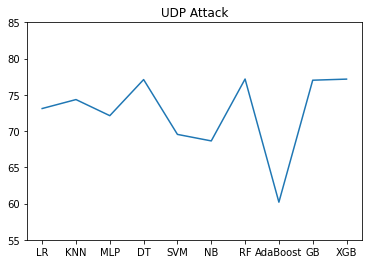

In [26]:
plt.plot(classifiers,scores)
plt.title("UDP Attack")
plt.ylim(55,85)
plt.show()

In [33]:
from sklearn.linear_model import LogisticRegression

model_lr = LogisticRegression()

model_lr.fit(X_train,y_train)
y_pred = model_lr.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")

Accuracy of  model is:  73.11197103982025
Confusion Matrix:
 [[   0    3    0    0    0    0    0]
 [   0 3780    0   15 1024   38    0]
 [   0    4    0    0    0    0    0]
 [   0    6    0  118    0    0    0]
 [   0 1033    0    0 1253    0    0]
 [   0   28    0    0    0  706    0]
 [   0    3    0    0    0    0    0]]
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.78      0.78      0.78      4857
           2       0.00      0.00      0.00         4
           3       0.89      0.95      0.92       124
           4       0.55      0.55      0.55      2286
           5       0.95      0.96      0.96       734
           6       0.00      0.00      0.00         3

    accuracy                           0.73      8011
   macro avg       0.45      0.46      0.46      8011
weighted avg       0.73      0.73      0.73      8011


==============***===============


C:\Users\aaron\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in l

In [34]:
from sklearn.neighbors import KNeighborsClassifier

model_knn = KNeighborsClassifier(n_neighbors=3)

model_knn.fit(X_train,y_train)
y_pred = model_knn.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")

Accuracy of  model is:  74.34777181375608
Confusion Matrix:
 [[   0    0    0    0    1    0    2    0]
 [   3 4046    2   13  784    8    1    0]
 [   0    2    1    1    0    0    0    0]
 [   0    3    1  119    0    0    0    1]
 [   0 1229    0    0 1057    0    0    0]
 [   0    3    0    0    0  731    0    0]
 [   0    1    0    0    0    0    2    0]
 [   0    0    0    0    0    0    0    0]]
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.77      0.83      0.80      4857
           2       0.25      0.25      0.25         4
           3       0.89      0.96      0.93       124
           4       0.57      0.46      0.51      2286
           5       0.99      1.00      0.99       734
           6       0.40      0.67      0.50         3
           7       0.00      0.00      0.00         0

    accuracy                           0.74      8011
   macro avg       0.48      0.52      0.50

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [35]:
from sklearn.neural_network import MLPClassifier

model_mlp = MLPClassifier(alpha=0.005)

model_mlp.fit(X_train,y_train)
y_pred = model_mlp.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")

Accuracy of  model is:  74.46011733865934
Confusion Matrix:
 [[   0    3    0    0    0    0    0    0]
 [   3 3862    2    8  976    6    0    0]
 [   0    0    3    1    0    0    0    0]
 [   0    2    0  121    0    0    0    1]
 [   0 1041    0    0 1245    0    0    0]
 [   0    0    0    0    0  734    0    0]
 [   0    3    0    0    0    0    0    0]
 [   0    0    0    0    0    0    0    0]]
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.79      0.80      0.79      4857
           2       0.60      0.75      0.67         4
           3       0.93      0.98      0.95       124
           4       0.56      0.54      0.55      2286
           5       0.99      1.00      1.00       734
           6       0.00      0.00      0.00         3
           7       0.00      0.00      0.00         0

    accuracy                           0.74      8011
   macro avg       0.48      0.51      0.49

C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_cla

In [36]:
from sklearn.tree import DecisionTreeClassifier

model_dt = DecisionTreeClassifier()

model_dt.fit(X_train,y_train)
y_pred = model_dt.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")

Accuracy of  model is:  77.14392710023718
Confusion Matrix:
 [[   0    1    0    0    0    0    2]
 [   3 3833    1    4 1015    1    0]
 [   0    1    1    1    0    0    1]
 [   0    2    1  120    0    0    1]
 [   0  796    0    0 1490    0    0]
 [   0    0    0    0    0  734    0]
 [   0    1    0    0    0    0    2]]
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.83      0.79      0.81      4857
           2       0.33      0.25      0.29         4
           3       0.96      0.97      0.96       124
           4       0.59      0.65      0.62      2286
           5       1.00      1.00      1.00       734
           6       0.33      0.67      0.44         3

    accuracy                           0.77      8011
   macro avg       0.58      0.62      0.59      8011
weighted avg       0.78      0.77      0.77      8011


==============***===============


In [27]:
from sklearn.svm import SVC

model_svm = SVC()

model_svm.fit(X_train,y_train)
y_pred = model_svm.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")

Accuracy of  model is:  69.54187991511671
Confusion Matrix:
 [[   0    3    0    0    0    0    0]
 [   3 2610    0   29 2199   16    0]
 [   0    2    0    2    0    0    0]
 [   0    2    0  122    0    0    0]
 [   0  154    0    0 2132    0    0]
 [   0   27    0    0    0  707    0]
 [   0    3    0    0    0    0    0]]
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.93      0.54      0.68      4857
           2       0.00      0.00      0.00         4
           3       0.80      0.98      0.88       124
           4       0.49      0.93      0.64      2286
           5       0.98      0.96      0.97       734
           6       0.00      0.00      0.00         3

    accuracy                           0.70      8011
   macro avg       0.46      0.49      0.45      8011
weighted avg       0.81      0.70      0.70      8011


==============***===============


C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [28]:
from sklearn.naive_bayes import GaussianNB

model_bayes = GaussianNB()

model_bayes.fit(X_train,y_train)
y_pred = model_bayes.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")


Accuracy of  model is:  68.64311571589064
Confusion Matrix:
 [[   1    0    2    0    0    0    0]
 [  11 2385   24   26 2401    4    6]
 [   0    0    0    4    0    0    0]
 [   0    1    1  122    0    0    0]
 [   3   22    0    0 2261    0    0]
 [   0    7    0    0    0  727    0]
 [   0    0    0    0    0    0    3]]
Report:
               precision    recall  f1-score   support

           0       0.07      0.33      0.11         3
           1       0.99      0.49      0.66      4857
           2       0.00      0.00      0.00         4
           3       0.80      0.98      0.88       124
           4       0.48      0.99      0.65      2286
           5       0.99      0.99      0.99       734
           6       0.33      1.00      0.50         3

    accuracy                           0.69      8011
   macro avg       0.52      0.68      0.54      8011
weighted avg       0.84      0.69      0.69      8011


==============***===============


In [29]:
from sklearn.ensemble import RandomForestClassifier

model_rf = RandomForestClassifier()

model_rf.fit(X_train,y_train)
y_pred = model_rf.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")


Accuracy of  model is:  77.19385844463862
Confusion Matrix:
 [[   0    1    0    0    0    0    2]
 [   3 3835    1    1 1016    1    0]
 [   0    1    2    1    0    0    0]
 [   0    2    1  121    0    0    0]
 [   0  796    0    0 1490    0    0]
 [   0    0    0    0    0  734    0]
 [   0    1    0    0    0    0    2]]
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.83      0.79      0.81      4857
           2       0.50      0.50      0.50         4
           3       0.98      0.98      0.98       124
           4       0.59      0.65      0.62      2286
           5       1.00      1.00      1.00       734
           6       0.50      0.67      0.57         3

    accuracy                           0.77      8011
   macro avg       0.63      0.65      0.64      8011
weighted avg       0.78      0.77      0.77      8011


==============***===============


In [30]:
from sklearn.ensemble import AdaBoostClassifier

model_adc = AdaBoostClassifier()

print()
model_adc.fit(X_train,y_train)
y_pred = model_adc.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")



Accuracy of  model is:  60.19223567594557
Confusion Matrix:
 [[   0    3    0    0    0    0    0]
 [   0 2691   41    0 2125    0    0]
 [   0    0    4    0    0    0    0]
 [   0    0  124    0    0    0    0]
 [   0  159    0    0 2127    0    0]
 [   0  734    0    0    0    0    0]
 [   0    3    0    0    0    0    0]]
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.75      0.55      0.64      4857
           2       0.02      1.00      0.05         4
           3       0.00      0.00      0.00       124
           4       0.50      0.93      0.65      2286
           5       0.00      0.00      0.00       734
           6       0.00      0.00      0.00         3

    accuracy                           0.60      8011
   macro avg       0.18      0.35      0.19      8011
weighted avg       0.60      0.60      0.57      8011


==============***===============


C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\aaron\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [31]:
from sklearn.ensemble import GradientBoostingClassifier

model_gb = GradientBoostingClassifier()

print()
model_gb.fit(X_train,y_train)
y_pred = model_gb.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")



Accuracy of  model is:  77.03158157533392
Confusion Matrix:
 [[   0    3    0    0    0    0    0]
 [   3 3903   10    2  937    1    1]
 [   0    0    4    0    0    0    0]
 [   0    2    4  118    0    0    0]
 [   0  873    0    0 1413    0    0]
 [   0    1    0    0    0  733    0]
 [   0    3    0    0    0    0    0]]
Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00         3
           1       0.82      0.80      0.81      4857
           2       0.22      1.00      0.36         4
           3       0.98      0.95      0.97       124
           4       0.60      0.62      0.61      2286
           5       1.00      1.00      1.00       734
           6       0.00      0.00      0.00         3

    accuracy                           0.77      8011
   macro avg       0.52      0.62      0.54      8011
weighted avg       0.77      0.77      0.77      8011


==============***===============


In [32]:
from xgboost import XGBClassifier

model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

y_pred = model_xgb.predict(X_test)
score = accuracy_score(y_test, y_pred)*100
scores.append(score)
print("Accuracy of  model is: ", score)
conf_matrix = confusion_matrix(y_test,y_pred)
report = classification_report(y_test,y_pred)
print("Confusion Matrix:\n",conf_matrix)
print("Report:\n",report)
print("\n==============***===============")


[21:39:57] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


C:\Users\aaron\anaconda3\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


Accuracy of  model is:  77.1688927724379
Confusion Matrix:
 [[   2    1    0    0    0    0    0]
 [   3 3835    1    3 1014    0    1]
 [   0    1    1    2    0    0    0]
 [   0    2    1  121    0    0    0]
 [   0  798    0    0 1488    0    0]
 [   0    1    0    0    0  733    0]
 [   0    1    0    0    0    0    2]]
Report:
               precision    recall  f1-score   support

           0       0.40      0.67      0.50         3
           1       0.83      0.79      0.81      4857
           2       0.33      0.25      0.29         4
           3       0.96      0.98      0.97       124
           4       0.59      0.65      0.62      2286
           5       1.00      1.00      1.00       734
           6       0.67      0.67      0.67         3

    accuracy                           0.77      8011
   macro avg       0.68      0.71      0.69      8011
weighted avg       0.78      0.77      0.77      8011


==============***===============
